### Evolving Network Analysis - January 2018
#### <i>Abdel K. Bokharouss, Joris Rombouts, Bart van Helvert, Remco Surtel</i>

#### Imports, preparation, and creating the graphs

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import tkinter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
temp_nw = pd.read_table("./data/tgraph_real_wikiedithyperlinks.txt", header = None, sep = " ",
                       names = ["src", "trg", "start", "end"])

In [3]:
temp_nw.head()

,src,trg,start,end
0,1,6,1028243088,1120917090
1,1,8,1029885647,1136791625
2,1,9,1029885647,1136791625
3,1,3,1028243088,1143227562
4,1,3,1146727453,1148998304


In [4]:
temp_nw['start'] = pd.to_datetime(temp_nw['start'], unit = 's') #convert Unix timestamps to date time, utc = 0
temp_nw['end'] = pd.to_datetime(temp_nw['end'], unit = 's')

In [5]:
#test function for unix time stamps to datetime
print(
    datetime.datetime.fromtimestamp(
        int("1028243088")
    ).strftime('%Y-%m-%d %H:%M:%S')
)

2002-08-02 01:04:48


In [6]:
temp_nw.head(10)

,src,trg,start,end
0,1,6,2002-08-01 23:04:48,2005-07-09 13:51:30
1,1,8,2002-08-20 23:20:47,2006-01-09 07:27:05
2,1,9,2002-08-20 23:20:47,2006-01-09 07:27:05
3,1,3,2002-08-01 23:04:48,2006-03-24 19:12:42
4,1,3,2006-05-04 07:24:13,2006-05-30 14:11:44
5,1,5,2002-08-01 23:04:48,2007-07-10 19:45:45
6,1,2,2002-08-01 23:04:48,2007-07-10 19:45:45
7,1,3,2006-06-06 12:47:15,2007-07-10 19:45:45
8,1,4,2002-08-01 23:04:48,2007-07-10 19:45:45
9,1,7,2002-08-01 23:04:48,2007-07-10 19:45:45


In [7]:
temp_nw.shape

(4729035, 4)

In [24]:
# Select edges where start is between the start of 2002 and the start of 2004
T1 = datetime.datetime(2002, 1, 1, 0, 0, 0)
T2 = datetime.datetime(2004, 1, 1, 0, 0, 0)
df_G1 = temp_nw.copy()
df_G1 = df_G1[((df_G1['start'] >= T1) & (df_G1['start'] < T2)) | ((df_G1['end'] >= T1) & (df_G1['end'] < T2))]
df_G1.shape

(213645, 4)

In [25]:
# Initialize a directed graph G from the given pandas dataframe.
G1 = nx.from_pandas_dataframe(df_G1, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

Now we have a directed graph $G_1$ containing only the edges that were present at some point between $T_1 = $ 2002-01-01 00:00:00 and $T_2 = $ 2004-01-01 00:00:00.

Let's repeat these steps to generate some more graphs, $G_2, G_3, G_4, G_5$, each with only the edges that appear between $T_i$ and $T_{i+1}$ for $G_i$.

In [15]:
T3 = datetime.datetime(2006, 1, 1, 0, 0, 0)
T4 = datetime.datetime(2008, 1, 1, 0, 0, 0)
T5 = datetime.datetime(2010, 1, 1, 0, 0, 0)
T6 = datetime.datetime(2012, 1, 1, 0, 0, 0)

In [16]:
df_G2 = temp_nw.copy()
df_G2 = df_G2[((df_G2['start'] >= T2) & (df_G2['start'] < T3)) | ((df_G2['end'] >= T2) & (df_G2['end'] < T3))]
df_G2.shape

(1157321, 4)

In [17]:
# Initialize a directed graph G from the given pandas dataframe.
G2 = nx.from_pandas_dataframe(df_G2, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

In [18]:
df_G3 = temp_nw.copy()
df_G3 = df_G3[((df_G3['start'] >= T3) & (df_G3['start'] < T4)) | ((df_G3['end'] >= T3) & (df_G3['end'] < T4))]
df_G3.shape

(2281227, 4)

In [19]:
# Initialize a directed graph G from the given pandas dataframe.
G3 = nx.from_pandas_dataframe(df_G3, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

In [20]:
df_G4 = temp_nw.copy()
df_G4 = df_G4[((df_G4['start'] >= T4) & (df_G4['start'] < T5)) | ((df_G4['end'] >= T4) & (df_G4['end'] < T5))]
df_G4.shape

(1783757, 4)

In [21]:
# Initialize a directed graph G from the given pandas dataframe.
G4 = nx.from_pandas_dataframe(df_G4, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

In [22]:
df_G5 = temp_nw.copy()
df_G5 = df_G5[((df_G5['start'] >= T5) & (df_G5['start'] < T6)) | ((df_G5['end'] >= T5) & (df_G5['end'] < T6))]
df_G5.shape

(1107141, 4)

In [23]:
# Initialize a directed graph G from the given pandas dataframe.
G5 = nx.from_pandas_dataframe(df_G5, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

## The HITS algorithm
#### (Hyperlink-Induced Topic Search; also known as hubs and authorities)

Now that we have a graph for each of the time ranges, let's run the HITS algorithm on each of them.

In [35]:
# Run the HITS algorithm from networkx.
# Returns two-tuple of dictionaries: (hubs, authorities).
HITS1 = nx.hits(G1)
HITS2 = nx.hits(G2)
HITS3 = nx.hits(G3)
HITS4 = nx.hits(G4)
HITS5 = nx.hits(G5)

In [36]:
hubs1 = HITS1[0]
authorities1 = HITS1[1]
hubs2 = HITS2[0]
authorities2 = HITS2[1]
hubs3 = HITS3[0]
authorities3 = HITS3[1]
hubs4 = HITS4[0]
authorities4 = HITS4[1]
hubs5 = HITS5[0]
authorities5 = HITS5[1]

Creating DataFrames with the hub- and authority-values:

In [37]:
# DataFrames for hub values
df_hubs1 = pd.DataFrame.from_dict(hubs1, orient='index')
df_hubs1.columns = ['Hub values']
df_hubs1['Node'] = df_hubs1.index
cols = df_hubs1.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hubs1 = df_hubs1[cols]

df_hubs2 = pd.DataFrame.from_dict(hubs2, orient='index')
df_hubs2.columns = ['Hub values']
df_hubs2['Node'] = df_hubs2.index
cols = df_hubs2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hubs2 = df_hubs2[cols]

df_hubs3 = pd.DataFrame.from_dict(hubs3, orient='index')
df_hubs3.columns = ['Hub values']
df_hubs3['Node'] = df_hubs3.index
cols = df_hubs3.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hubs3 = df_hubs3[cols]

df_hubs4 = pd.DataFrame.from_dict(hubs4, orient='index')
df_hubs4.columns = ['Hub values']
df_hubs4['Node'] = df_hubs4.index
cols = df_hubs4.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hubs4 = df_hubs4[cols]

df_hubs5 = pd.DataFrame.from_dict(hubs5, orient='index')
df_hubs5.columns = ['Hub values']
df_hubs5['Node'] = df_hubs5.index
cols = df_hubs5.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hubs5 = df_hubs5[cols]

# Example
df_hubs1.head()

,Node,Hub values
1,1,0.000055
6,6,0.000000
8,8,0.000000
9,9,0.000845
3,3,0.000060


In [38]:
# DataFrames for hub values
df_auth1 = pd.DataFrame.from_dict(authorities1, orient='index')
df_auth1.columns = ['Authority values']
df_auth1['Node'] = df_auth1.index
cols = df_auth1.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_auth1 = df_auth1[cols]

df_auth2 = pd.DataFrame.from_dict(authorities2, orient='index')
df_auth2.columns = ['Authority values']
df_auth2['Node'] = df_auth2.index
cols = df_auth2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_auth2 = df_auth2[cols]

df_auth3 = pd.DataFrame.from_dict(authorities3, orient='index')
df_auth3.columns = ['Authority values']
df_auth3['Node'] = df_auth3.index
cols = df_auth3.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_auth3 = df_auth3[cols]

df_auth4 = pd.DataFrame.from_dict(authorities4, orient='index')
df_auth4.columns = ['Authority values']
df_auth4['Node'] = df_auth4.index
cols = df_auth4.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_auth4 = df_auth4[cols]

df_auth5 = pd.DataFrame.from_dict(authorities5, orient='index')
df_auth5.columns = ['Authority values']
df_auth5['Node'] = df_auth5.index
cols = df_auth5.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_auth5 = df_auth5[cols]

# Example
df_auth1.head()

,Node,Authority values
1,1,0.000057
6,6,0.000026
8,8,0.000075
9,9,0.001097
3,3,0.000428


In [39]:
# Merging each of the hub DataFrames with the corresponding authority DataFrame
df_HITS1 = pd.merge(df_hubs1, df_auth1, on='Node')
df_HITS2 = pd.merge(df_hubs2, df_auth2, on='Node')
df_HITS3 = pd.merge(df_hubs3, df_auth3, on='Node')
df_HITS4 = pd.merge(df_hubs4, df_auth4, on='Node')
df_HITS5 = pd.merge(df_hubs5, df_auth5, on='Node')

# Example
df_HITS1.head()

,Node,Hub values,Authority values
0,1,0.000055,0.000057
1,6,0.000000,0.000026
2,8,0.000000,0.000075
3,9,0.000845,0.001097
4,3,0.000060,0.000428


Saving the DataFrames to CSV files, and importing the CSV files again, so we don't have to re-run the algorithm. (It takes a long time!)

In [40]:
# Save the DataFrames to CSV files so we don't have to run the HITS algorithm ever again
df_HITS1.to_csv('./Data/HITS1.csv')
df_HITS2.to_csv('./Data/HITS2.csv')
df_HITS3.to_csv('./Data/HITS3.csv')
df_HITS4.to_csv('./Data/HITS4.csv')
df_HITS5.to_csv('./Data/HITS5.csv')

In [41]:
# Import the DataFrames again from the CSV files.
df_HITS1 = pd.DataFrame.from_csv('./Data/HITS1.csv')
df_HITS2 = pd.DataFrame.from_csv('./Data/HITS2.csv')
df_HITS3 = pd.DataFrame.from_csv('./Data/HITS3.csv')
df_HITS4 = pd.DataFrame.from_csv('./Data/HITS4.csv')
df_HITS5 = pd.DataFrame.from_csv('./Data/HITS5.csv')

# Example
df_HITS1.head()

,Node,Hub values,Authority values
0,1,0.000055,0.000057
1,6,0.000000,0.000026
2,8,0.000000,0.000075
3,9,0.000845,0.001097
4,3,0.000060,0.000428


## Analysis
Now that we have dataframes containing the hub- and authority-values for each node, let's analyze them to see what differences or interesting attributes we can find.

We will start by looking at the top-3 best hubs and authorities for each time range.

In [42]:
df_HITS1 = df_HITS1.sort_values(by=['Hub values'], ascending=False)
df_HITS1.head(3)

,Node,Hub values,Authority values
1631,103662,0.001953,0.000033
8937,5617,0.001415,0.000048
1380,126,0.001245,0.002013


In [43]:
df_HITS2 = df_HITS2.sort_values(by=['Hub values'], ascending=False)
df_HITS2.head(3)

,Node,Hub values,Authority values
29614,38845,0.000313,8.515347e-05
97094,45852,0.000312,7.046423e-08
154998,78070,0.000310,6.613650e-07


In [44]:
df_HITS3 = df_HITS3.sort_values(by=['Hub values'], ascending=False)
df_HITS3.head(3)

,Node,Hub values,Authority values
14271,9261,0.000403,7.590150e-08
7645,7540,0.000383,2.828857e-05
7646,7541,0.000379,6.449276e-05


In [45]:
df_HITS4 = df_HITS4.sort_values(by=['Hub values'], ascending=False)
df_HITS4.head(3)

,Node,Hub values,Authority values
11995,9261,0.000678,2.591263e-07
7689,18857,0.000585,2.613865e-05
5909,7541,0.000566,3.142813e-05


In [46]:
df_HITS5 = df_HITS5.sort_values(by=['Hub values'], ascending=False)
df_HITS5.head(3)

,Node,Hub values,Authority values
84577,680980,0.001091,7.628692e-109
1523,280,0.001083,1.470502e-04
87039,685436,0.001065,0.000000e+00


Immediately, we can see that the top-3 hub values are much higher for time the first DataFrame (2002 - 2004) than for the other DataFrames. Which is interesting, because this DataFrame contains far less edges than the others do.

Now, let's look at the authority values.

In [47]:
df_HITS1 = df_HITS1.sort_values(by=['Authority values'], ascending=False)
df_HITS1.head(3)

,Node,Hub values,Authority values
5811,26251,0.000440,0.019242
6387,26254,0.000216,0.012391
315,394,0.000365,0.007192


In [48]:
df_HITS2 = df_HITS2.sort_values(by=['Authority values'], ascending=False)
df_HITS2.head(3)

,Node,Hub values,Authority values
10810,4088,0.000000e+00,0.049216
5808,9366,2.239920e-07,0.045545
10075,11726,3.820598e-09,0.040704


In [49]:
df_HITS3 = df_HITS3.sort_values(by=['Authority values'], ascending=False)
df_HITS3.head(3)

,Node,Hub values,Authority values
2133,300,0.000345,0.007415
362,241,0.000295,0.006257
2128,240,0.000219,0.005970


In [50]:
df_HITS4 = df_HITS4.sort_values(by=['Authority values'], ascending=False)
df_HITS4.head(3)

,Node,Hub values,Authority values
1665,442,0.000340,0.005523
4081,2240,0.000337,0.005489
1667,300,0.000266,0.005441


In [51]:
df_HITS5 = df_HITS5.sort_values(by=['Authority values'], ascending=False)
df_HITS5.head(3)

,Node,Hub values,Authority values
4652,300,0.000013,0.004626
5694,442,0.000033,0.004518
4021,241,0.000017,0.004431


Again, we see that DataFrame 1 (2002 - 2004) has higher values than most other DataFrames. However, we can see that the authority values for DataFrame 2 (2004 - 2006) are much higher still. We would expect the hub- and authority-values to be more or less similar, because the hub-values are the sum of the connected authorities, and the authority-values are the sum of the connected hubs, the values are directly related. It's odd then, that for DataFrame 2 (2004 - 2006) the authority values are so much higher, while the hub-values were lower than the rest.

Let's create a scatter plot like we did in task 1, to see if we can learn why this happens.

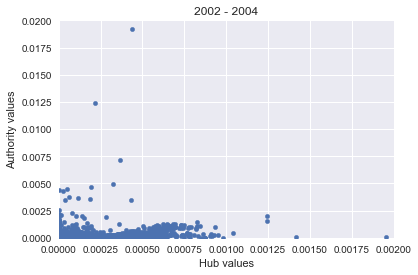

In [54]:
df_HITS1.plot(kind='scatter', x='Hub values', y='Authority values', s=20, title='2002 - 2004')
plt.xlim(0, 0.002)
plt.ylim(0, 0.02)
plt.show()

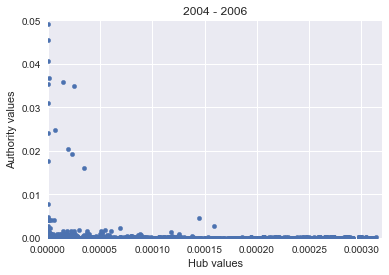

In [57]:
df_HITS2.plot(kind='scatter', x='Hub values', y='Authority values', s=20, title='2004 - 2006')
plt.xlim(0, 0.00032)
plt.ylim(0, 0.05)
plt.show()

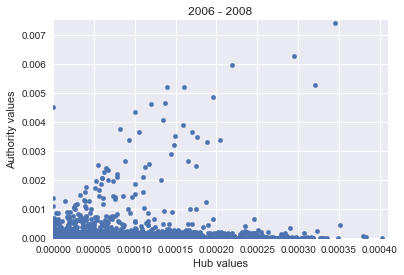

In [58]:
df_HITS3.plot(kind='scatter', x='Hub values', y='Authority values', s=20, title='2006 - 2008')
plt.xlim(0, 0.00041)
plt.ylim(0, 0.0075)
plt.show()

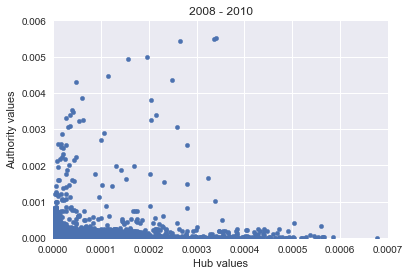

In [59]:
df_HITS4.plot(kind='scatter', x='Hub values', y='Authority values', s=20, title='2008 - 2010')
plt.xlim(0, 0.0007)
plt.ylim(0, 0.006)
plt.show()

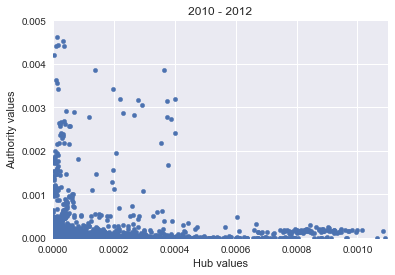

In [60]:
df_HITS5.plot(kind='scatter', x='Hub values', y='Authority values', s=20, title='2010 - 2012')
plt.xlim(0, 0.0011)
plt.ylim(0, 0.005)
plt.show()

It is immediately obvious that there are very large differences between each of the plots. In plot #2 (2004 - 2006), which showed unexpectedly high authority values, we can see that the whole x-axis is filled with nodes that have no authority whatsoever, but that do have quite high hub-values. This explains why there are such high authority-values. Because there are so many hubs, if many of them link to a certain node, then obviously that node is going to have a very high authority.

Plot #3 (2006 - 2008) is most similar to the plot that we saw in task 1, where we ran the HITS algorithm on the complete static graph containing all edges. This is easily explained by the fact that this time range contains more edges than all the other time ranges (2281227/4729035). Having most of the edges of the original graph, it makes sense that the plot for this time range is closest to the original plot.

Plot #4 (2008 - 2010) and plot #5 (2010 - 2012) look very similar to each other. They look like the graph of an inverse power, with a few odd nodes scattered above said graph. They are mostly similar to the original plot, except that there appear to be far more strong authorities that aren't good hubs. The main observation that we had on the original plot was that there weren't any nodes that had a high authority without being decent hubs as well. For some reason, that appears to have changed in these last two time ranges. 

Plot #1 (2002 - 2004) is fairly boring, except for a couple of extreme outliers. This is probably caused by the fact that this time range has the least amount of edges (213645/4729035). A smaller sample size always means that there will be a higher chance for inconsistencies.